In [1]:
import os
import sys

os.chdir('..')
sys.path.append('src')

In [18]:
# Remove study from storage

from utilsOptuna import remove_study_from_storage

remove_study_from_storage('sqlite:///optuna/optuna_ML_exercise.db', 'MML_xgboost_data1')

Study 'MML_xgboost_data1' deleted successfully


In [12]:
# List of studies from a storage

from utilsOptuna import info_studies_from_storage

storage = 'sqlite:///optuna/optuna_ML_exercise.db'
print(f"Storage: {storage}")
info_studies_from_storage(storage)

Storage: sqlite:///optuna/optuna_ML_exercise.db


,study_name,best_score,description
0,MML_randomforest_data1,15.292058,Random Forest
1,MML_xgboost_data1,15.246006,XGBoost
2,MML_SVR_RBF_data1,13.805907,SVR RBF


In [13]:
# Load study from storage

from utilsOptuna import Study

storage = 'sqlite:///optuna/optuna_ML_exercise.db'
study_name = 'MML_SVR_RBF_data1'
study_data = Study(storage, study_name)


Loading MML_SVR_RBF_data1 study...



In [5]:
# Show study config

study_data.show_study_config()

Showing MML_xgboost_data1 study...
XGBoost
{'random_state': 42,
 'datafile': 'data/airbnb-listings-extract.csv',
 'load': functools.partial(<function read_csv at 0x7f8e331a5fc0>, delimiter=';'),
 'preproc_features': <function preprocess_features01 at 0x7f8e2cddedd0>,
 'preproc_target': <function preprocess_target01 at 0x7f8e2c7d2560>,
 'split_test': 0.2,
 'proc': {'module': 'utilsFT',
          'class': 'TransformMetadata',
          'function': 'get_transformation',
          'parameters': {'name': 'transform01'}},
 'model': <class 'xgboost.sklearn.XGBRegressor'>,
 'scoring': {'rmse': {'module': 'sklearn.metrics',
                      'function': 'root_mean_squared_error',
                      'parameters': {}},
             'medAE': {'module': 'sklearn.metrics',
                       'function': 'median_absolute_error',
                       'parameters': {}},
             'r2': {'module': 'sklearn.metrics',
                    'function': 'r2_score',
                    'paramet

In [14]:
# Compressed info for each run
study_data.show_runs()


Showing MML_SVR_RBF_data1 study...


,name_run,start,complete,pruned,fail,total,best_score
0,base_run,2025-12-03 17:39:48,10,0,0,10,13.806


In [7]:
# List of runs for a study (extended version)
study_data.show_runs_extended()


Showing MML_xgboost_data1 study...

run		start			C/P/F	best
extension_run	2025-12-03 13:05:21	10/0/0	15.246
Optimized
{'eta': FloatDistribution(high=0.1, log=False, low=0.001, step=None),
 'max_depth': IntDistribution(high=15, log=False, low=8, step=1),
 'n_estimators': IntDistribution(high=300, log=False, low=25, step=1),
 'reg_alpha': IntDistribution(high=9, log=False, low=3, step=1),
 'reg_lambda': IntDistribution(high=10, log=False, low=0, step=1)}
Fixed
{'model': {'random_state': 42}}

run		start			C/P/F	best
base_run	2025-12-03 13:01:16	10/0/0	15.556
Optimized
{'eta': FloatDistribution(high=0.1, log=False, low=0.001, step=None),
 'max_depth': IntDistribution(high=10, log=False, low=3, step=1),
 'n_estimators': IntDistribution(high=700, log=False, low=25, step=1),
 'reg_alpha': IntDistribution(high=9, log=False, low=3, step=1),
 'reg_lambda': IntDistribution(high=10, log=False, low=0, step=1)}
Fixed
{'model': {'random_state': 42}}


In [17]:
# Best result for study
study_data.show_best_result_study()

Showing MML_SVR_RBF_data1 study...
Best trial:
  Number:  1
  Value:  13.8059066081857
  Params: 
    C:	4.57056
    gamma:	0.09847


Showing MML_SVR_RBF_data1 study...


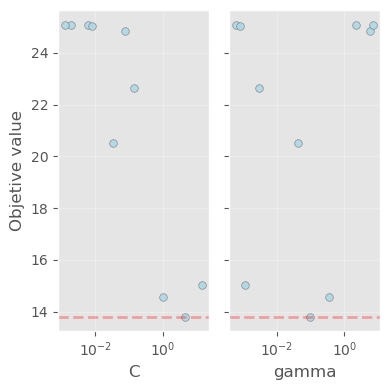

In [15]:
# Plot slice
study_data.plot_slice()

/tmp/ipykernel_234625/1833816894.py:8: ExperimentalWarning: optuna.visualization.matplotlib._contour.plot_contour is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_contour(study_data.study, params=params) # 2D contour plot


<Axes: title={'center': 'Contour Plot'}, xlabel='C', ylabel='gamma'>

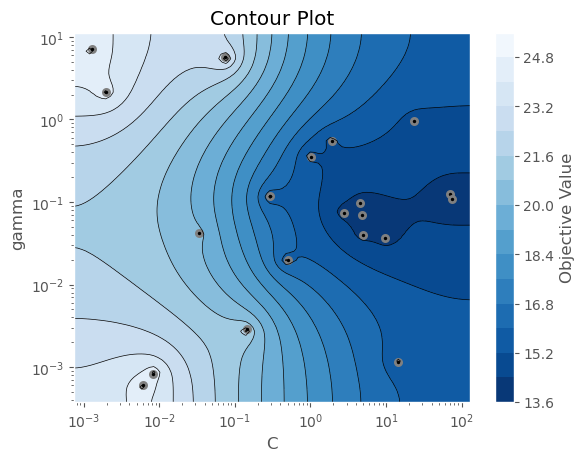

In [16]:
# Plot contour fro two optimized hyperparamters

import optuna

# TODO Highlight best result.
# TODO Configure score min/max
params = ['C', 'gamma']
optuna.visualization.matplotlib.plot_contour(study_data.study, params=params) # 2D contour plot
